In [33]:
# 패션 MNIST - 훈련세트, 테스트 세트 
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [34]:
# 모델 생성 함수 - 층 추가가 가능 
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28))) # 입력층
    model.add(keras.layers.Flatten()) 
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [35]:
# model = model_fn()
model = model_fn(keras
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
train_scaled = train_input / 255
test_scaled = test_input / 255

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(test_scaled, test_target)) # history 객체 - 정확도, 손실률에 대한 각 에포크별 측정 데이터

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7742 - loss: 0.6444 - val_accuracy: 0.8325 - val_loss: 0.4599
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8595 - loss: 0.3854 - val_accuracy: 0.8516 - val_loss: 0.4049
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8721 - loss: 0.3512 - val_accuracy: 0.8641 - val_loss: 0.3796
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8810 - loss: 0.3272 - val_accuracy: 0.8636 - val_loss: 0.3816
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8893 - loss: 0.3033 - val_accuracy: 0.8760 - val_loss: 0.3421
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8940 - loss: 0.2863 - val_accuracy: 0.8682 - val_loss: 0.3610
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8979 - loss: 0.2786 - val_accuracy: 0.8752 - val_loss: 0.3402
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8995 - loss: 0.2697 - 

In [37]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


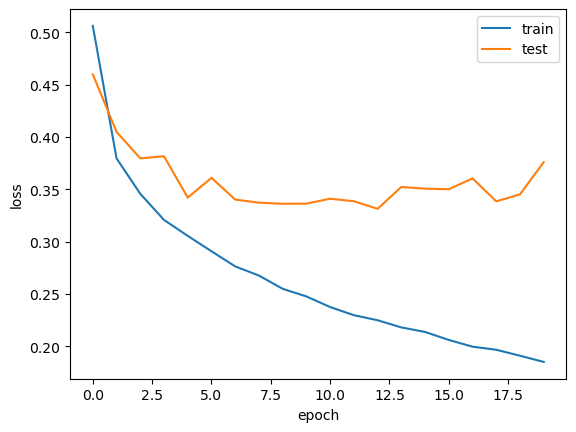

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) # 학습 세트 손실률 
plt.plot(history.history['val_loss']) # 테스트 세트 손실률 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

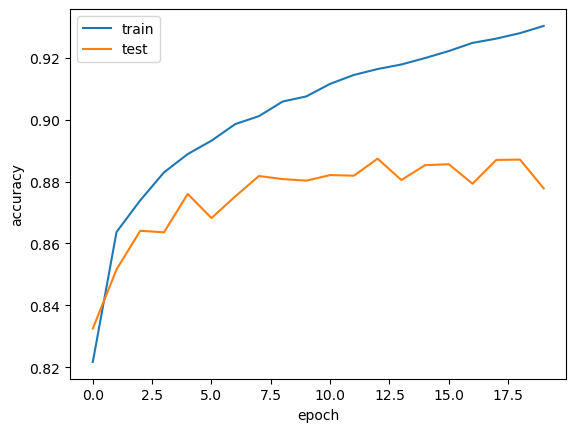

In [39]:
plt.plot(history.history['accuracy']) # 학습 세트 정확도 
plt.plot(history.history['val_accuracy']) # 테스트 세트 정확도 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()